In [1]:
from sklearn import tree
import pandas as pd
import os
import numpy as np

In [2]:
df = pd.read_csv(os.path.join("winequality-red.csv"))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
target = df["quality"]
target_names = ["3", "4", "5", "6", "7", "8"]

In [4]:
data = df.drop("quality", axis=1)
feature_names = data.columns
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [16]:
feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [5]:
feature_list = feature_names.tolist()
feature_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5825

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.67

In [9]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.15091989964298852, 'alcohol'),
 (0.1118073522838895, 'sulphates'),
 (0.10764597965827807, 'total sulfur dioxide'),
 (0.10203359116945274, 'volatile acidity'),
 (0.09162573284610039, 'density'),
 (0.08156844078543415, 'chlorides'),
 (0.07497052652315603, 'fixed acidity'),
 (0.0723489460038299, 'residual sugar'),
 (0.07187577453095421, 'citric acid'),
 (0.0705444657881312, 'pH'),
 (0.06465929076778532, 'free sulfur dioxide')]

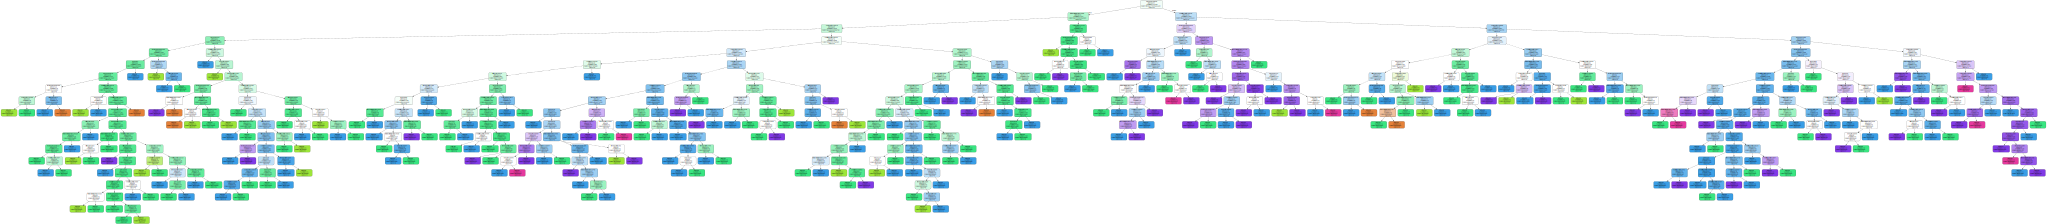

In [42]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_list,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('rw.png')

graph = graphviz.Source(dot_data)  
graph 

In [37]:
from joblib import dump, load
>>> dump(rf, 'redwinerandom.joblib') 

['redwinerandom.joblib']

In [31]:
rf2 = load('redwinerandom.joblib') 

In [34]:
rf2.predict([1],
           [1])

TypeError: predict() takes 2 positional arguments but 3 were given